### Comparing Models

Now that you have seen a variety of models for regression and classification problems, it is good to step back and weigh the pros and cons of these options.  In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on your dataset and goals, the importance of these considerations will vary from project to project.  Your goal is to review our models to this point and discuss the pros and cons of each.  Two example datasets are offered as a way to offer two very different tasks where interpretability of the model may be of differing importance.

### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import set_config
set_config(display="diagram")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
import warnings
warnings.filterwarnings('ignore')


In [3]:
from sklearn.datasets import load_digits

In [6]:
import dill
dill.dump_session('notebook_env.db')

ModuleNotFoundError: No module named 'dill'

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

In [8]:
churn = pd.read_csv('/Users/apekshasridhar/Downloads/try-it_16_1_starter/data/telecom_churn.csv')
digits, labels = load_digits(return_X_y=True)

In [1]:
#churn data
churn.head()

NameError: name 'churn' is not defined

<AxesSubplot:>

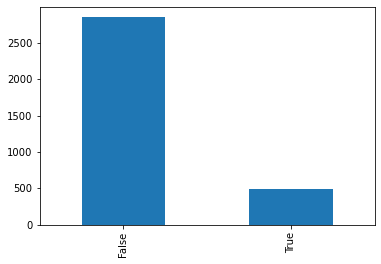

In [40]:
X = churn.drop(columns = 'Churn', axis = 1)
y = churn['Churn']
X_dum = pd.get_dummies(X, sparse=True, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.3, random_state = 22)
churn['Churn'].value_counts().plot(kind='bar')


In [69]:
%%time
### KNN
knn_pipe = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier())]).fit(X_train, y_train)

knn_params = {'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

grid_knn = GridSearchCV(knn_pipe, param_grid = knn_params, cv = 5).fit(X_train, y_train)

print(grid_knn.best_params_)
print("KNN test score: ", grid_knn.score(X_test, y_test))

{'model__n_neighbors': 5}
KNN test score:  0.849
CPU times: user 12.3 s, sys: 318 ms, total: 12.6 s
Wall time: 4.99 s


In [70]:
%%time
### Logistic Regression

lgr_pipe = Pipeline([('scale', StandardScaler()), 
                      ('model', LogisticRegression(fit_intercept = False))]).fit(X_train, y_train)

print(lgr_pipe)
print("Logistic Regression test score: ", lgr_pipe.score(X_test, y_test))

Pipeline(steps=[('scale', StandardScaler()),
                ('model', LogisticRegression(fit_intercept=False))])
Logistic Regression test score:  0.658
CPU times: user 146 ms, sys: 26.7 ms, total: 172 ms
Wall time: 94.1 ms


In [71]:
%%time
### Decision Trees

dt_pipe = DecisionTreeClassifier().fit(X_train, y_train)
dt_params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}

grid_dt = GridSearchCV(dt_pipe, param_grid = dt_params, cv = 5).fit(X_train, y_train)

print(grid_dt.best_params_)
print("Decision Tree test score: ", grid_dt.score(X_test, y_test))

{'max_depth': 6}
Decision Tree test score:  0.925
CPU times: user 1.74 s, sys: 18.6 ms, total: 1.76 s
Wall time: 1.78 s


In [72]:
%%time
### SVM 

svc_pipe = SVC().fit(X_train, y_train)
svc_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_svc = GridSearchCV(svc_pipe, param_grid = svc_params, cv = 5).fit(X_train, y_train)

print(grid_svc.best_params_)
print("SVC test score: ", grid_svc.score(X_test, y_test))


{'kernel': 'linear'}
SVC test score:  0.844
CPU times: user 3min 59s, sys: 933 ms, total: 4min
Wall time: 4min 8s


**TASK 2**: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which of your classifier would you use here and why?  Again, be sure to consider the balance of classes, speed of training, and importance of interpretability.



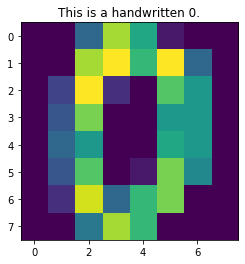

In [73]:
#example image
plt.imshow(digits[0].reshape(8, 8))
plt.title('This is a handwritten 0.');

<AxesSubplot:>

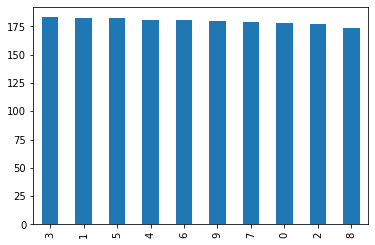

In [77]:
X = digits
y = pd.Series(labels)
#X_dum = pd.get_dummies(X, sparse=True, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)
y.value_counts().plot(kind='bar')

In [78]:
%%time
### KNN
knn_pipe = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier())]).fit(X_train, y_train)

knn_params = {'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

grid_knn = GridSearchCV(knn_pipe, param_grid = knn_params, cv = 5).fit(X_train, y_train)

print(grid_knn.best_params_)
print("KNN test score: ", grid_knn.score(X_test, y_test))

{'model__n_neighbors': 1}
KNN test score:  0.9777777777777777
CPU times: user 3 s, sys: 41.2 ms, total: 3.04 s
Wall time: 780 ms


In [79]:
%%time
### Logistic Regression

lgr_pipe = Pipeline([('scale', StandardScaler()), 
                      ('model', LogisticRegression(fit_intercept = False))]).fit(X_train, y_train)

print(lgr_pipe)
print("Logistic Regression test score: ", lgr_pipe.score(X_test, y_test))

Pipeline(steps=[('scale', StandardScaler()),
                ('model', LogisticRegression(fit_intercept=False))])
Logistic Regression test score:  0.9703703703703703
CPU times: user 278 ms, sys: 16.7 ms, total: 295 ms
Wall time: 99 ms


In [80]:
%%time
### Decision Trees

dt_pipe = DecisionTreeClassifier().fit(X_train, y_train)
dt_params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}

grid_dt = GridSearchCV(dt_pipe, param_grid = dt_params, cv = 5).fit(X_train, y_train)

print(grid_dt.best_params_)
print("Decision Tree test score: ", grid_dt.score(X_test, y_test))

{'max_depth': 9}
Decision Tree test score:  0.8111111111111111
CPU times: user 440 ms, sys: 4.46 ms, total: 445 ms
Wall time: 445 ms


In [82]:
%%time
### SVM 

svc_pipe = SVC(decision_function_shape='ovo').fit(X_train, y_train)
svc_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_svc = GridSearchCV(svc_pipe, param_grid = svc_params, cv = 5).fit(X_train, y_train)

print(grid_svc.best_params_)
print("SVC test score: ", grid_svc.score(X_test, y_test))


{'kernel': 'poly'}
SVC test score:  0.9851851851851852
CPU times: user 1.15 s, sys: 99.8 ms, total: 1.25 s
Wall time: 1.64 s


In [84]:
%%time
### SVM 

svc_pipe = SVC(kernel = 'poly', decision_function_shape='ovo').fit(X_train, y_train)
svc_params = {'degree': [1,2,3,4,5,6,7,8]}

grid_svc = GridSearchCV(svc_pipe, param_grid = svc_params, cv = 5).fit(X_train, y_train)

print(grid_svc.best_params_)
print("SVC test score: ", grid_svc.score(X_test, y_test))

{'degree': 4}
SVC test score:  0.987037037037037
CPU times: user 1.24 s, sys: 20.4 ms, total: 1.26 s
Wall time: 1.3 s
